From the dataframe (which contains the company_data.csv's features), I am tasked to create a model to predict who to be promoted based on different features of the dataframe. You can see it in cell-2 of this notebook and how the features helped the model shape itself. On how effective the model are, it did show 82% of accuracy which is efficient enough for a not-so-serious project but I used real-world-data from openml (phpMawTba / adult dataset).


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("company_data.csv")
X = df.drop(columns=["class"])
y = df["class"]

# One-hot encoding on categorical variables, split data
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic R- with class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
# Evaluate the model's performance
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c_report = classification_report(y_test, y_pred)
print("Classification Report:\n", c_report)

c_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", c_matrix)

# Count the number of individuals predicted to be promoted and not promoted
promoted_count = sum(y_pred == ' >50K')
not_promoted_count = sum(y_pred == ' <=50K')
print("predicted to be promoted:", promoted_count)
print("predicted not to be promoted:", not_promoted_count)


Accuracy: 0.8154365851161839
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.95      0.80      0.87      7479
        >50K       0.57      0.85      0.68      2290

    accuracy                           0.82      9769
   macro avg       0.76      0.83      0.78      9769
weighted avg       0.86      0.82      0.83      9769

Confusion Matrix:
 [[6010 1469]
 [ 334 1956]]
predicted to be promoted: 3425
predicted not to be promoted: 6344


In [2]:
# Retrieving coefficients from the logistic regression model
coefficients = model.coef_[0]

# Pair feature names with coefficients
feature_coefficients = dict(zip(X.columns, coefficients))

# Sort feature coefficients by their absolute values
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)
coefficients_list = []

category, values = [], []
for feature, coefficient in sorted_feature_coefficients:
    category.append(feature); values.append(round(float(coefficient), 2))
    
sorted_feature_coefficients

[('education', 2.3306396789807455),
 ('age', 0.4139236301530863),
 ('marital-status', 0.4105932866522296),
 ('fnlwgt', 0.35015969147418624),
 ('education-num', 0.26426257849983614),
 ('relationship', 0.1106156980082395),
 ('hours-per-week', -0.09236977877867847),
 ('sex', -0.08730737832696994),
 ('occupation', -0.07845524286588196),
 ('workclass', 0.07315302400949276),
 ('capital-gain', 0.06135359707782565),
 ('capital-loss', 0.06099887692190782),
 ('native-country', -0.04755494196334729),
 ('race', -0.016621064568015667)]

Text(0.5, 1.0, 'Coefficients of Features')

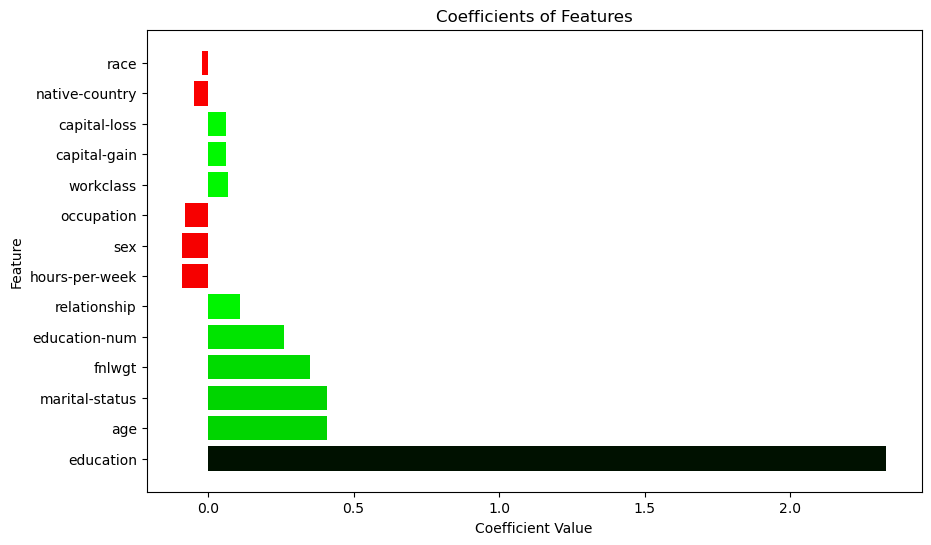

In [3]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

plt.figure(figsize=(10,6))

for i, val in enumerate(values):
    if val > 0:
        color = (0, 1 - val/2.5, 0)
    else:
        color = (1 - abs(val/2.5), 0, 0)
    plt.barh(category[i], val, color=color)

plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Features')


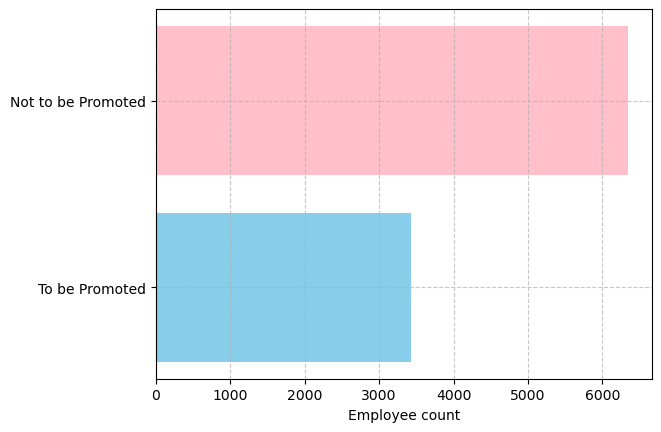

In [4]:
import matplotlib.pyplot as plt

plt.barh("To be Promoted", promoted_count, color='skyblue')
plt.barh("Not to be Promoted", not_promoted_count, color='pink')
plt.xlabel('Employee count')
# plt.ylabel('')
plt.title('')
plt.grid(True, linestyle='--', alpha=0.7)


This Test is just to show it to my prof:

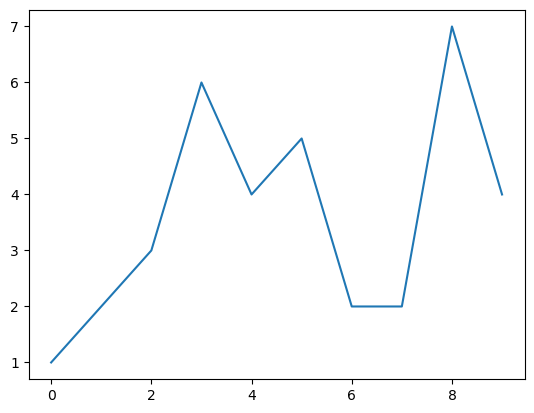

In [7]:
val = [1,2,3,6,4,5,2,2,7,4]
test = [1,2,3,4,5,6,7,8,9,10]
index = np.arange(len(test))

plot = lambda data: plt.plot(index, data)

plot(val)

In [8]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
# promotion_mapping = {' <=50K': 0, ' >50K': 1}
# df['is_promoted'] = df['class'].map(promotion_mapping)

# # Drop the original 'class' column if no longer needed
# df.drop(columns=['class'], inplace=True)

# #  Modified DataFrame
# print(df.head())

   age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country  is_promoted  
0             0              40   U

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)
corr_matrix = df_encoded.corr()

corr_matrix["is_promoted"].sort_values(ascending=False)

h = corr_matrix["is_promoted"].sort_values(ascending=False).head()
t = corr_matrix["is_promoted"].sort_values(ascending=False).tail()

med = corr_matrix["is_promoted"].median()
less_m = corr_matrix[corr_matrix["is_promoted"] < med]
m = less_m["is_promoted"].sort_values(ascending=True).head()

print(f"{h} \n\n{t} \n\n{m}")


is_promoted                           1.000000
marital-status_ Married-civ-spouse    0.445853
relationship_ Husband                 0.403791
education-num                         0.332613
age                                   0.230369
Name: is_promoted, dtype: float64 

occupation_ Other-service       -0.155254
relationship_ Not-in-family     -0.190372
sex_ Female                     -0.214628
relationship_ Own-child         -0.225691
marital-status_ Never-married   -0.318782
Name: is_promoted, dtype: float64 

marital-status_ Never-married   -0.318782
relationship_ Own-child         -0.225691
sex_ Female                     -0.214628
relationship_ Not-in-family     -0.190372
occupation_ Other-service       -0.155254
Name: is_promoted, dtype: float64


<Axes: title={'center': 'Top Correlated Features to promotion'}, xlabel='Correlation', ylabel='Features'>

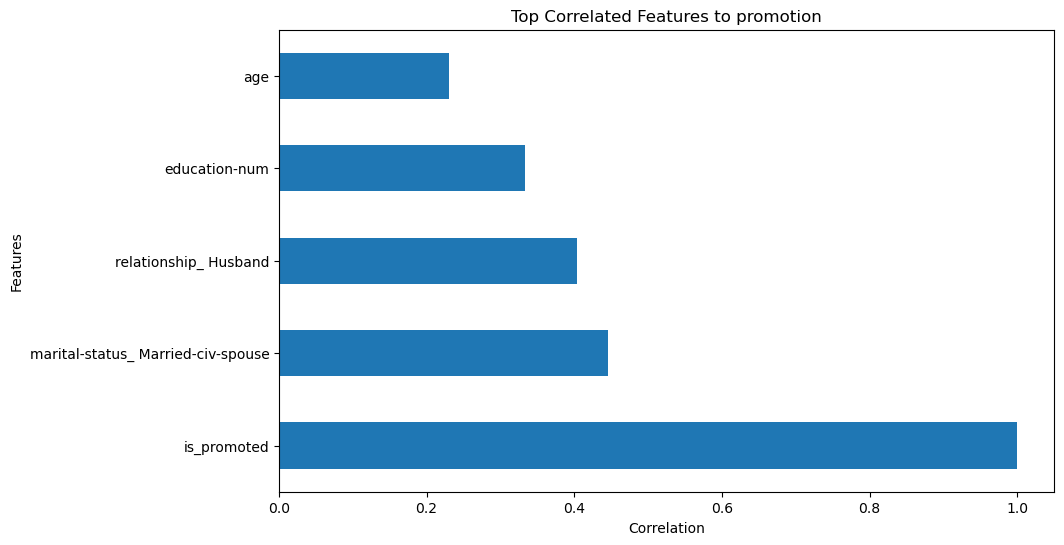

In [14]:
plt.figure(figsize=(10,6))
h.plot(kind="barh", xlabel="Correlation", ylabel="Features", title= "Top Correlated Features to promotion")

<Axes: title={'center': "Top Correlated Features to 'no promotion'"}, xlabel='Correlation', ylabel='Features'>

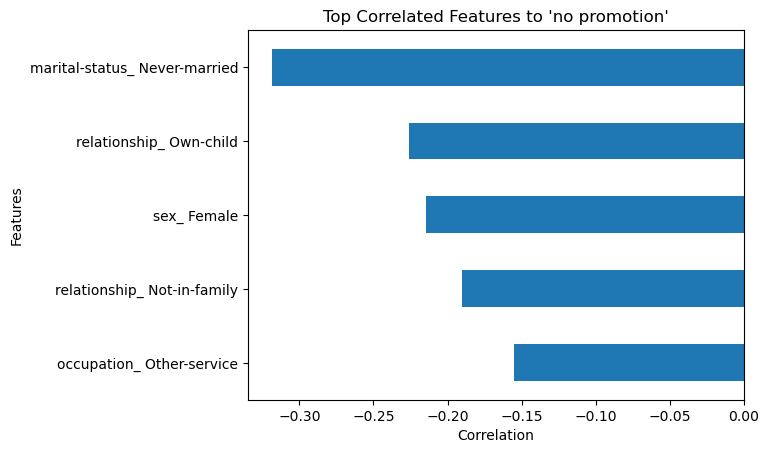

In [15]:
t.plot(kind="barh", xlabel="Correlation", ylabel="Features", title= "Top Correlated Features to 'no promotion'")

<Axes: title={'center': 'Features that affect the prediction less'}, xlabel='Correlation', ylabel='Features'>

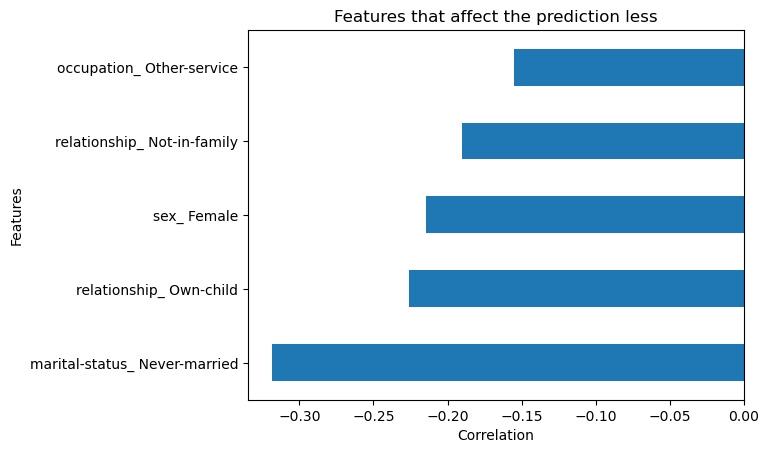

In [16]:
m.plot(kind="barh", xlabel="Correlation", ylabel="Features", title= "Features that affect the prediction less")

<Axes: title={'center': "Features that do 'no' or close to 'no effect' on predictions"}, xlabel='Correlation', ylabel='Features'>

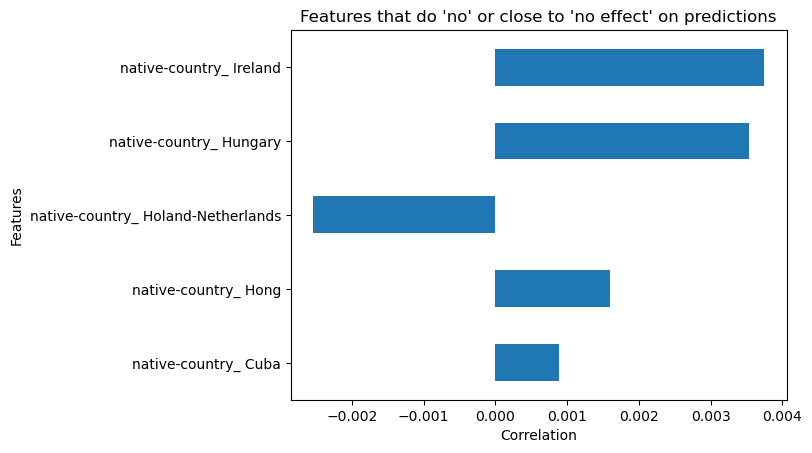

In [17]:
# Sort the correlation values in ascending order of their absolute differences from zero
sorted_corr = corr_matrix["is_promoted"].abs().sort_values()
median_values = corr_matrix.loc[sorted_corr.index[:5], "is_promoted"]
median_based_on_values = median_values.median()
median_values.plot(kind="barh", xlabel="Correlation", ylabel="Features", title= "Features that do 'no' or close to 'no effect' on predictions")
